In [1]:
import pandas as pd


meta = pd.read_csv('data/kaggle/training_set_metadata.csv')
lcs = pd.read_csv('data/kaggle/training_set.csv')
df = pd.merge(left=meta, right=lcs, on='object_id')

In [2]:
df['target'].unique()

array([92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53])

In [ ]:
# hard: 15, 67, 42, 52, 90
# easy: 6, 53, 64, 65, 88, 92, 93  

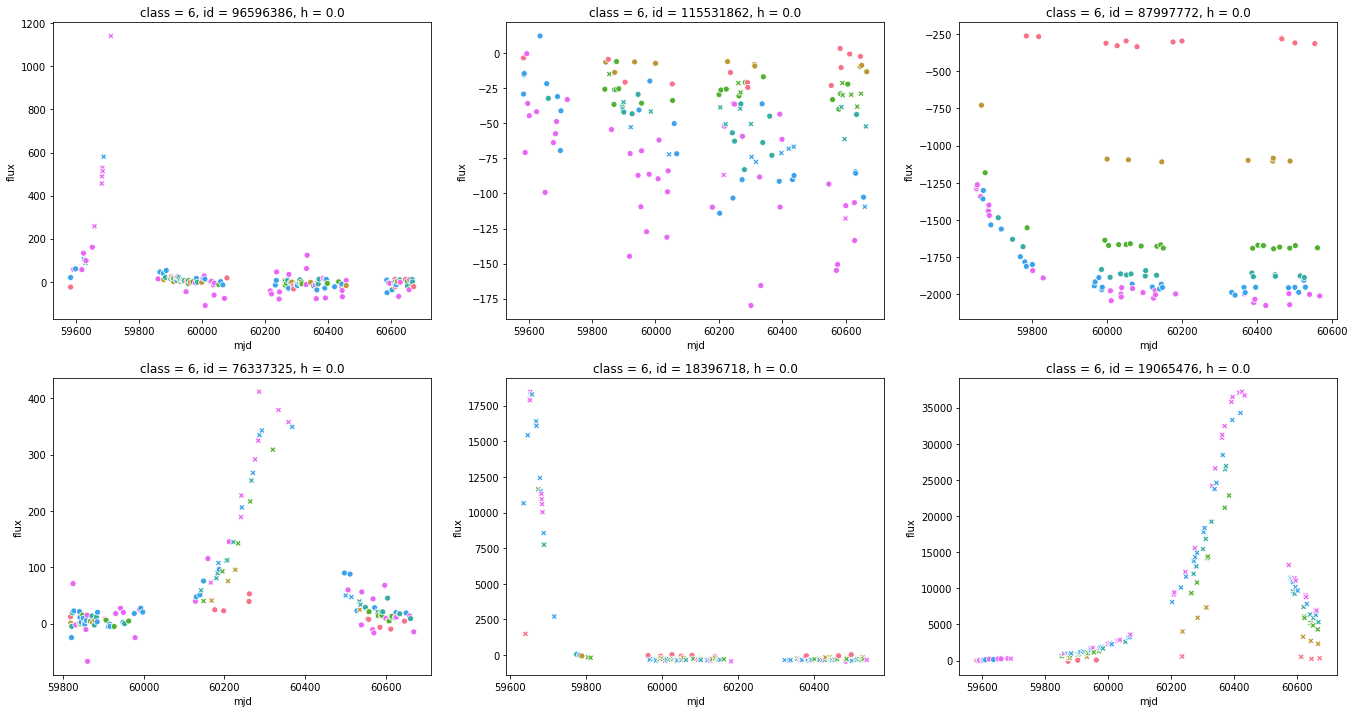

In [7]:
import random

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

classes = [6]

ids = {
    c: meta[meta['target'] == c].sample(6)['object_id'].tolist()
    for c in classes
}

plt.rcParams['axes.grid'] = False

fig = plt.figure(figsize=(23, 12))
columns = 3
rows = 2

i = 1

for c in ids:
    for id in ids[c]:
        ax = fig.add_subplot(rows, columns, i)
        lc = df.query(f'object_id == {id}').copy()
        sns.scatterplot(x='mjd', y='flux', hue='passband', style='detected',markers=True, palette=sns.color_palette('husl', 6), data=lc, ax=ax)
        ax.set_title(f'class = {c}, id = {id}, h = {lc["hostgal_photoz"].mean()}')
        ax.get_legend().remove()
        #lc = lcs.query('id')
        i+=1

In [8]:
lc = df.query('object_id == 76337325')
lc.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,mjd,passband,flux,flux_err,detected
1111317,76337325,49.921875,-2.537361,184.638227,-46.859812,0,0.0,0.0,0.0,NaN,0.069,6,59819.3163,0,12.314188,11.835416,0
1111318,76337325,49.921875,-2.537361,184.638227,-46.859812,0,0.0,0.0,0.0,NaN,0.069,6,59819.3553,1,0.873428,3.695812,0
1111319,76337325,49.921875,-2.537361,184.638227,-46.859812,0,0.0,0.0,0.0,NaN,0.069,6,59820.4024,3,-4.282979,8.644000,0
1111320,76337325,49.921875,-2.537361,184.638227,-46.859812,0,0.0,0.0,0.0,NaN,0.069,6,59821.3405,2,-4.504237,5.628614,0
1111321,76337325,49.921875,-2.537361,184.638227,-46.859812,0,0.0,0.0,0.0,NaN,0.069,6,59821.4094,4,-24.650925,14.999453,0


In [13]:
import numpy as np
from scipy import stats

def calc_feature(g):
    d = g.query('detected == True')
    slope, *_ = stats.linregress(d['mjd'], d['flux'])
    return np.log(np.abs(slope))

features = lcs.groupby('object_id')[['mjd', 'flux', 'detected']].apply(calc_feature)

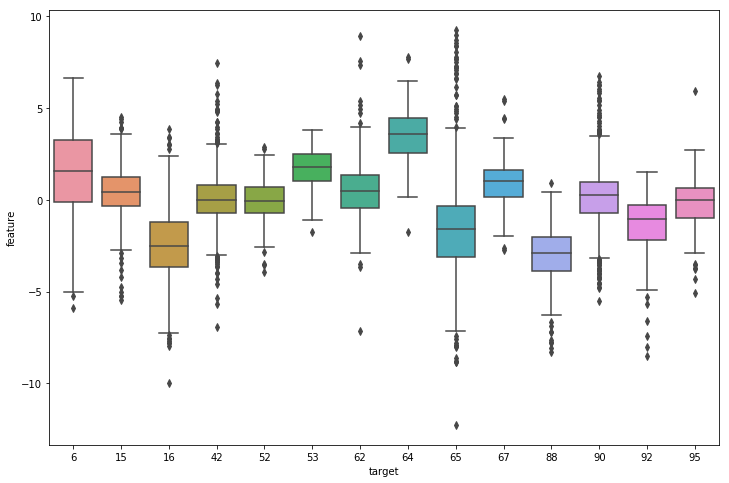

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='target', y='feature', data=meta.join(features.rename('feature'), on='object_id'), ax=ax);